# Unsupervised Learning - Assignment


Anton Akusok

<anton.akusok@arcada.fi>

Slack: `@Anton Akusok`

1. Data normalization
    - Look at features of Linnerud dataset, tell what is the problem with them
          from sklearn.datasets import load_linnerud
    - Normalize these features using a correct method. Plot original vs normalized probability density.

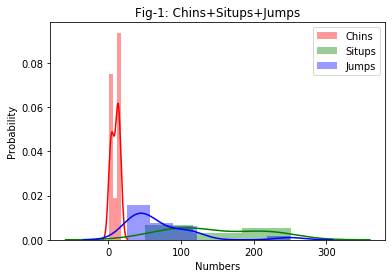

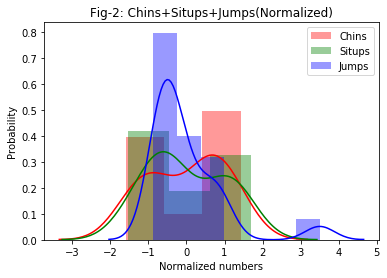

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_linnerud
from sklearn import preprocessing
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
#figsize = [18, 4]
# Download the data and convert it to dataframe
dataset = load_linnerud()
dataset_df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
#dataset_plot = dataset_df[['Chins'],['Situps'],['Jumps']]
figsize = [18, 4]
sns.distplot(dataset_df['Chins'],color='r',label='Chins')
sns.distplot(dataset_df['Situps'],color='g',label='Situps')
ax = sns.distplot(dataset_df['Jumps'],color='b',label='Jumps')
ax.set_title('Fig-1: Chins+Situps+Jumps')
ax.set_xlabel('Numbers')
ax.set_ylabel('Probability')
plt.legend()
plt.show()

# Normalize 
normalized_df=(dataset_df-dataset_df.mean())/dataset_df.std()
sns.distplot(normalized_df['Chins'],color='r',label='Chins')
sns.distplot(normalized_df['Situps'],color='g',label='Situps')
ax = sns.distplot(normalized_df['Jumps'],color='b',label='Jumps')
ax.set_title('Fig-2: Chins+Situps+Jumps(Normalized)')
ax.set_xlabel('Normalized numbers')
ax.set_ylabel('Probability')
plt.legend()
plt.show()



From Fig-1, we can see the data range is too wide and their distributions are different.
After normalization, in Fig-2, they have similar distributions.

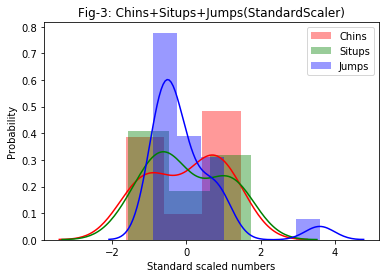

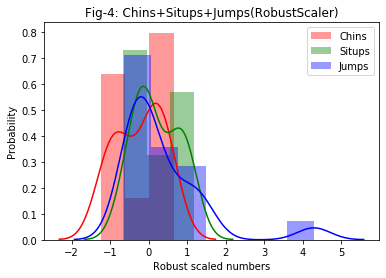

In [2]:
# Try standard scaler and robust scaler as well
from sklearn.preprocessing import StandardScaler, RobustScaler
sts = StandardScaler().fit(dataset_df)
rts = RobustScaler().fit(dataset_df)
dataset_sts = sts.transform(dataset_df)
dataset_rts = rts.transform(dataset_df)
sns.distplot(dataset_sts[:,0],color='r',label='Chins')
sns.distplot(dataset_sts[:,1],color='g',label='Situps')
ax = sns.distplot(dataset_sts[:,2],color='b',label='Jumps')
ax.set_title('Fig-3: Chins+Situps+Jumps(StandardScaler)')
ax.set_xlabel('Standard scaled numbers')
ax.set_ylabel('Probability')
plt.legend()
plt.show()

sns.distplot(dataset_rts[:,0],color='r',label='Chins')
sns.distplot(dataset_rts[:,1],color='g',label='Situps')
ax = sns.distplot(dataset_rts[:,2],color='b',label='Jumps')
ax.set_title('Fig-4: Chins+Situps+Jumps(RobustScaler)')
ax.set_xlabel('Robust scaled numbers')
ax.set_ylabel('Probability')
plt.legend()
plt.show()

By comparison, Fig-2 is same as Fig-3, actually, they use same algorithm to scale or normalization.
I assume that Fig-4(Robust scaler) is the better in this case.

    
2. Dimensionality reduction
    - Load 20 News Dataset
          from sklearn.datasets import fetch_20newsgroups_vectorized
          data = fetch_20newsgroups_vectorized(subset='train')
    - Use KernelPCA for dimensionality reduction. Train a classifier at different nr of dimensions, check how model score changes with dimensions
          Remember that you can load training and testing subsets of data!

In [3]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import RidgeCV

dataX = fetch_20newsgroups_vectorized(subset='train').data.toarray()
datay = fetch_20newsgroups_vectorized(subset='train').target
#datay = fetch_20newsgroups_vectorized(subset='test').data.toarray()
#data_df = pd.DataFrame(data.data.toarray(), columns= data.target_names)

n_samples, n_features = dataX.shape
print("Embedding: %d samples with dim: %d in train data, the data type is: %s"
      % (n_samples, n_features, str(type(dataX))))
print("target shape is: "+str(datay.shape) + 'and data type is'+str(type(datay)))
# Training dataset has 130107 features and it is a sparse dataset. we need to reduce
# useless features.

def trainingModelwithKPCA(components):
    pca = KernelPCA(n_components=components, kernel="rbf")
    Z = pca.fit_transform(dataX)
    model = RidgeCV().fit(Z, datay)
    print('With %d components, the score is: %f' % (components, model.score(Z, datay)))
np.unique(datay)

Embedding: 11314 samples with dim: 130107 in train data, the data type is: <class 'numpy.ndarray'>
target shape is: (11314,)and data type is<class 'numpy.ndarray'>


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [4]:
# 5 PCA components
#trainingModelwithKPCA(5)
# 10 PCA components
#trainingModelwithKPCA(10)
# 20 PCA components
#trainingModelwithKPCA(20)
# 30 PCA components
#trainingModelwithKPCA(30)


With 5 components, the score is: 0.014887;
With 10 components, the score is: 0.016861;
With 20 components, the score is: 0.017672;
With 30 components, the score is: 0.017814;
In summary, more components from 5 to 30, the higher score. I suppose the score will drop when the number of components reach some limits.

3. Clustering
    - Cluster 20 News Dataset into 20 clusters. Print true class vs cluster distribution. 
          Did you manage to recover the original clusters?  (give students an example plot)

In [5]:
from sklearn.cluster import k_means
data_matrix = fetch_20newsgroups_vectorized(subset='train').data
C, J, cost = k_means(data_matrix, n_clusters=20)

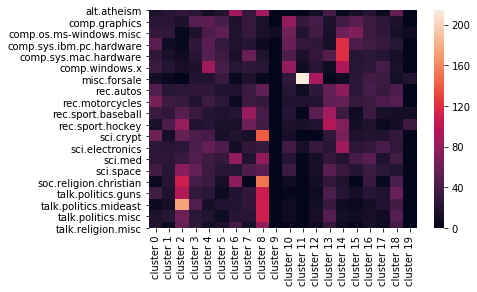

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
data = fetch_20newsgroups_vectorized(subset='train')
Y = data['target']
cm = confusion_matrix(Y, J)
sn.heatmap(cm, yticklabels=data['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])